In [10]:
# !pip install numpy pandas scipy matplotlib seaborn

<p style="align: center;"><img align=center src="https://mailfit.com/wp-content/uploads/2019/11/lego-5.png"  width=900></p>
<h1 style="text-align: center;"><b>«Практика подсчета статистик и формулирования гипотез
»</b></h3>


In [1]:
import numpy as np
import pandas as pd  # для работы с таблицами

from scipy import stats  # При работе со статистикой

import matplotlib.pyplot as plt  # Библиотека для визуализации результатов
import seaborn as sns  # Более продвинутая библиотека для визуализации

# Датасет с характеристиками автомобилей

In [12]:
data = pd.read_csv(
    "https://raw.githubusercontent.com/a-milenkin/mipt_data_science_2021/main/data/CarPrice_Assignment.csv"
)
print("Размер нашего датасета: {}".format(data.shape))
data.head()

# cookie_cats = "https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/cookie_cats.csv"
# data = pd.read_csv(cookie_cats, on_bad_lines="skip")  # Откроем датасет
# data.head()

Размер нашего датасета: (205, 26)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


<div class="alert alert-info">

<b>Про датасет: </b>
    
В датасет были собраны характеристики по машинами разных марок. Собрано около 26 характеристик машины, в том числе ее рыночная стоимость при продаже или покупке. Первоначальная цель датасета была в предсказании цены автомобиля по его описанию.  


</div>


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

<div class="alert alert-info">

    
Рассмотрим самый интересный столбец с <b> ценой на машины </b> - это столбец `price`

</div>




# Полезные статистики - среднее, медиана, дисперсия

In [14]:
# Среднее
data["price"].mean()

13276.710570731706

In [15]:
# медиана
data["price"].median()

10295.0

In [16]:
# дисперсия
data["price"].var()

63821761.57839796

In [17]:
# сумма
data["price"].sum()

2721725.667

In [18]:
# Колличество элементов
len(data["price"])

205

In [19]:
data["price"].sum() / len(data["price"])

13276.710570731706

In [20]:
data["citympg"].std()

6.54214165300162

In [ ]:
# data["CarName"].mean()

<div class="alert alert-info">

Этим список не ограничевается!

# Способы визуализации распределения данных 

## Гистограммы

<Axes: ylabel='Frequency'>

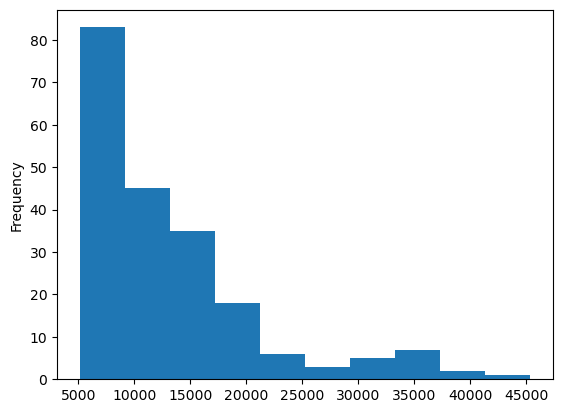

In [22]:
data["price"].plot.hist()

In [23]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

<Axes: ylabel='Frequency'>

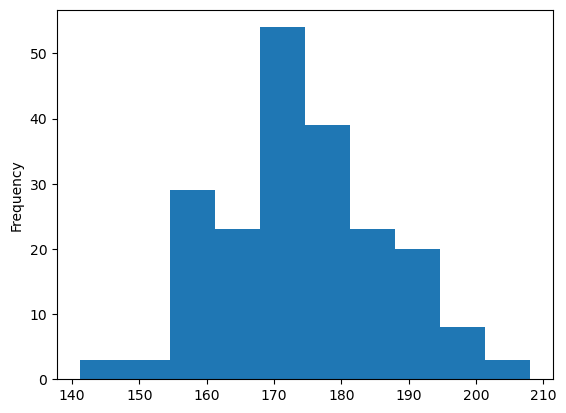

In [24]:
data["carlength"].plot.hist()

<Axes: >

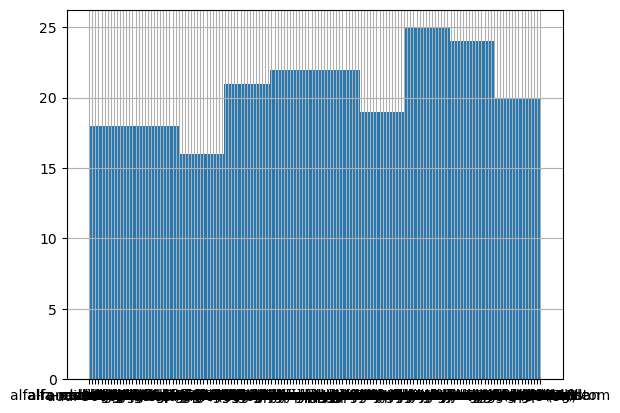

In [25]:
data["CarName"].hist()

In [26]:
data["CarName"].value_counts()

CarName
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: count, Length: 147, dtype: int64

In [27]:
for car_name, car_cnt in zip(
    data["CarName"].value_counts().index, data["CarName"].value_counts().values
):
    print(car_name, "-", car_cnt)

toyota corona - 6
toyota corolla - 6
peugeot 504 - 6
subaru dl - 4
mitsubishi mirage g4 - 3
mazda 626 - 3
toyota mark ii - 3
mitsubishi outlander - 3
mitsubishi g4 - 3
honda civic - 3
volvo 264gl - 2
bmw 320i - 2
isuzu D-Max  - 2
audi 100ls - 2
volvo 244dl - 2
porsche cayenne - 2
toyota corolla liftback - 2
honda accord - 2
bmw x3 - 2
volvo 144ea - 2
volvo 145e (sw) - 2
honda civic cvcc - 2
saab 99le - 2
toyota starlet - 2
saab 99gle - 2
toyota corolla 1200 - 2
mazda rx-4 - 2
mazda glc deluxe - 2
nissan rogue - 2
nissan latio - 2
mazda glc - 2
mazda rx-7 gs - 2
plymouth fury iii - 2
volkswagen dasher - 2
subaru - 2
nissan clipper - 2
peugeot 604sl - 2
saab 99e - 2
peugeot 304 - 1
peugeot 504 (sw) - 1
renault 5 gtl - 1
renault 12tl - 1
porsche boxter - 1
subaru brz - 1
porsche macan - 1
plymouth duster - 1
plymouth valiant - 1
plymouth fury gran sedan - 1
plymouth satellite custom (sw) - 1
plymouth cricket - 1
peugeot 505s turbo diesel - 1
porcshce panamera - 1
toyota corona mark ii - 1

In [28]:
# добавим параметров. Взможные параметры можно увидеть с помощью команды Shift + tab

<Axes: ylabel='Frequency'>

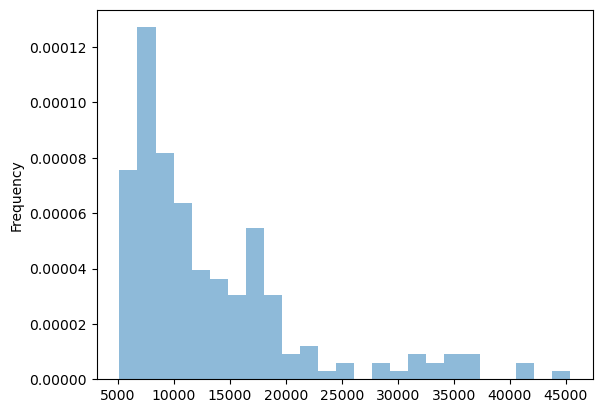

In [29]:
data["price"].plot.hist(bins=25, alpha=0.5, density=True)

## Боксплот - Ящики с усами. 

### Где тут усы? Где тут выбросы?

<p style="align: center;"><img align=center src="https://static.tildacdn.com/tild3366-6434-4530-a163-613065363237/boxplot.jpg"  width=1000></p>



<div class="alert alert-info">

    
**Выброс** — это такая точка, которая существенно отличается от большинства значений, взятых из выборки или совокупности. Есть множество возможных причин появления выбросов и вот для начала только несколько:

* Естественные выбросы данных.
* Изменение поведения наблюдаемой системы.
* Ошибки при сборе данных.

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd27b41f170>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd27b2f03e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd27b4bfd70>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd27b2f0a10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd27b2f0cb0>],
 'means': []}

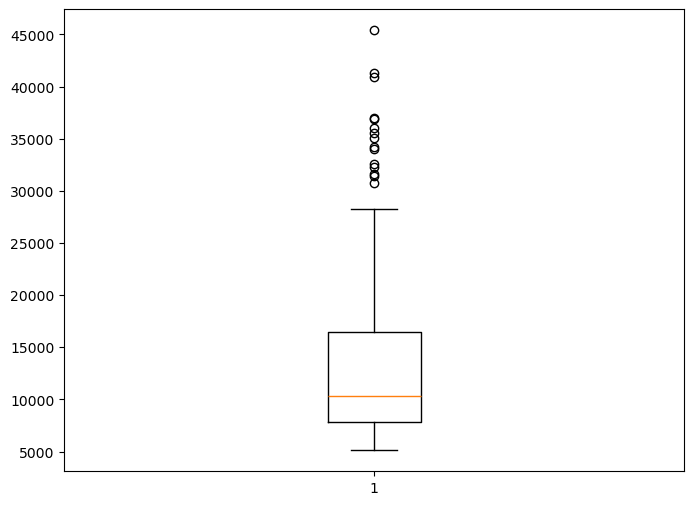

In [30]:
plt.figure(figsize=(8, 6))
plt.boxplot(data["price"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd27af37da0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd27af3c3b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd27b0a8e90>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd27af3caa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd27af3cbf0>],
 'means': []}

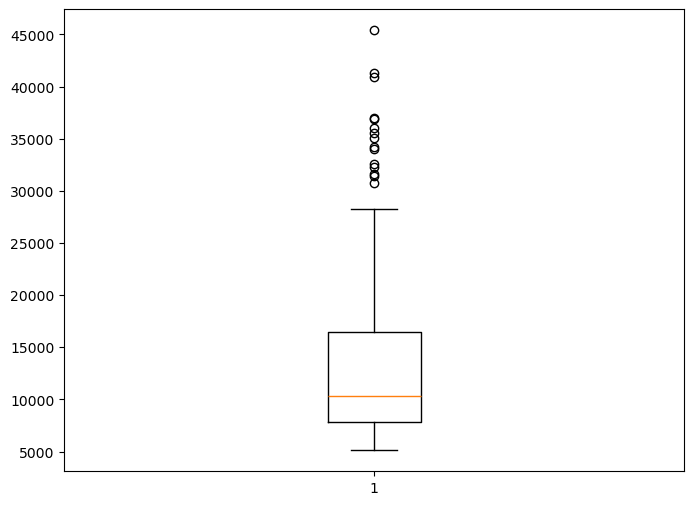

In [41]:
plt.figure(figsize=(8, 6))
plt.boxplot(data["price"])
# ; убирает ненужные пояснения

# Как доказать гипотезу, что цена на топливо зависит от типа топлива?

<Axes: xlabel='fueltype', ylabel='price'>

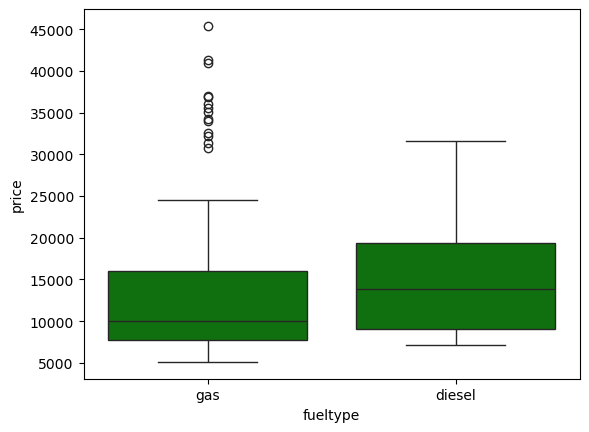

In [43]:
sns.boxplot(data=data, y="price", color="g", x="fueltype")

In [33]:
def my_func(x):
    return max(x)


data.groupby("fueltype", as_index=False).agg(
    {
        "price": "mean",
        "horsepower": my_func,
    }
)

,fueltype,price,horsepower
0,diesel,15838.1500,123
1,gas,12999.7982,288


<p style="align: center;"><img align=center src="https://static.tildacdn.com/tild6533-3362-4632-b632-333165363837/image.png"  width=900></p>


<Axes: xlabel='horsepower', ylabel='price'>

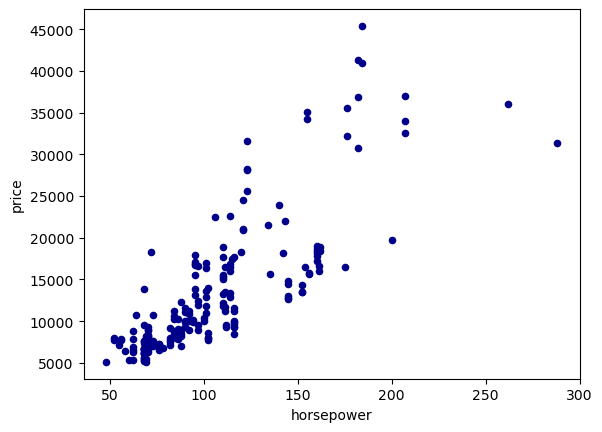

In [34]:
data.plot.scatter(y="price", x="horsepower", c="DarkBlue")

<Axes: xlabel='horsepower', ylabel='price'>

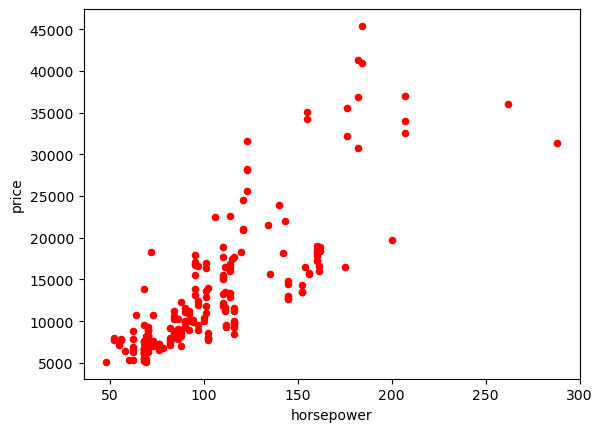

In [35]:
data.plot.scatter(y="price", x="horsepower", c="Red")

# Квантили, квартил, процентил и медиана

<div class="alert alert-info">

<!-- <b>Программа семинара: </b> -->
    
**Кванти́ль** — значение, которое заданная случайная величина не превышает с фиксированной вероятностью.

**Пример:** 80%-й квантиль выхода из строя станков на заводе равен три года - Это фраза значит, что 80% станков выходит из строя в течение первых трех лет, остальные 20% станков работают больше 3 лет


</div>




<p style="align: center;"><img align=center src="https://present5.com/presentation/3/120980285_176628086.pdf-img/120980285_176628086.pdf-43.jpg"  width=500></p>


<div class="alert alert-info">

**Квартиль** - это квантиль кратный 0.25 (четверти) 
    
    
**Процентиль** - это квантиль выраженный в процентах. Пример 40% процентиль или 0.40 квантиль

**Размах**, полученный из процентилей - растояние между двуменя процентилями    
    
</div>



In [36]:
np.quantile(data["price"], 0.5)  #

10295.0

In [37]:
data["price"].median()

10295.0

In [38]:
np.quantile(data["price"], 0.95)

32472.399999999994

# Дополнительных материалов

<div class="alert alert-info">

В качестве дополнительных материалов рекомендуется изучать самые популярные методы в Pandas

<p style="align: center;"><img align=center src="https://i0.wp.com/learnbyinsight.com/wp-content/uploads/2020/08/pandas-cheetsheet2.png?ssl=1_lesson.ipynb"  width=1000></p>

